# Case study #07, Supervised ML
### Sreelekshmy S L
### NDSA_B4

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment

In [2]:
iris_df = pd.read_excel('iris.xls')

In [3]:
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 5)

There are 150 rows and 5 columns.

In [5]:
iris_df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

The classification column consists of three unique values. And there is 50 each.

In [6]:
iris_df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are 4 numeric columns and they range differently.

## 2. Do necessary pre-processing steps.


### a. Missing Values

In [8]:
iris_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### There are 19 null values in the dataset divided among SL, SW and PL.

### Let us replace the null values with corresponding median of each feature.

In [9]:
iris_df[['SW','SL','PL']]=iris_df[['SW','SL','PL']].fillna(iris_df[['SW','SL','PL']].median())

In [10]:
iris_df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Filled all missing values

### b. Outliers 

### Boxplots for each continuous numeric features

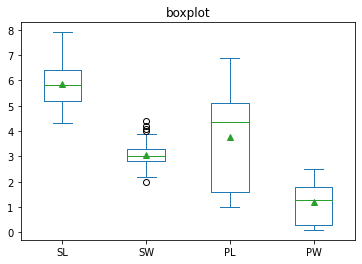

In [11]:
ax = iris_df[['SL','SW','PL','PW']].plot(kind='box', title='boxplot', showmeans=True)
plt.show()

### Outliers are found only in the feature SW

### Let us locate the outliers using IQR

In [12]:
Q1 = np.percentile(iris_df['SW'],25,interpolation='midpoint')
Q2 = np.percentile(iris_df['SW'],50,interpolation='midpoint')
Q3 = np.percentile(iris_df['SW'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in iris_df['SW']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
print('Total number of outliers in column Fare = ',len(outlier)  )

Total number of outliers in column Fare =  5


### A total of 5 outliers found. Let us replace these outliers with median value of SW.

In [13]:
iris_df['SW']=iris_df['SW'].mask((iris_df['SW'] > up_limit) | (iris_df['SW'] < low_limit),iris_df['SW'].median())

#### Again check the boxplot

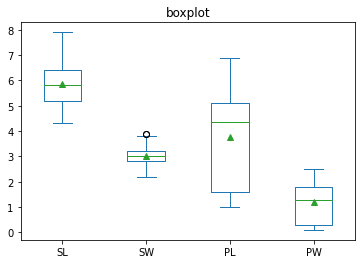

In [14]:
ax = iris_df[['SL','SW','PL','PW']].plot(kind='box', title='boxplot', showmeans=True)
plt.show()

### Now we have removed all outliers.

### c. Splitting the data into X and y.

In [15]:
X = iris_df.drop('Classification',axis=1)

In [16]:
y=iris_df['Classification']

### d. Train test splittng with test_size = 0.3

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',len(y_train))
print('y_test : ',len(y_test))

X_train :  (105, 4)
X_test :  (45, 4)
y_train :  105
y_test :  45


### e. Scaling X_train and X_test using SatndardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train= pd.DataFrame(scale.fit_transform(X_train))
X_test = pd.DataFrame(scale.fit_transform(X_test))

In [20]:
X_train.describe()

,0,1,2,3
count,1.050000e+02,1.050000e+02,105.000000,1.050000e+02
mean,-1.002373e-15,-2.251836e-17,0.000000,-4.229421e-18
std,1.004796e+00,1.004796e+00,1.004796,1.004796e+00
min,-1.945796e+00,-2.207404e+00,-1.654482,-1.536769e+00
25%,-8.340807e-01,-5.419375e-01,-1.296909,-1.131680e+00
50%,-9.293706e-02,1.321799e-02,0.282369,8.358997e-02
75%,6.482066e-01,5.683735e-01,0.729334,7.587397e-01
max,2.254018e+00,2.511418e+00,1.682860,1.703949e+00


Here we can see the mean is almost 0 and standard deviation is near 1.

##  3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

### Since it is multi-classification problem we can use either of the following : Logistic(multi_class), kNN, SVM or decision tree 

### a. LogisticRegression(multi-class)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
log_model = LogisticRegression(multi_class='multinomial')
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print('Accuracy is :', accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is : 0.9333333333333333


array([[19,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 13]], dtype=int64)

### Accuracy is 93% and 3 miss classification found 

### b.kNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(3,15)
acc_vals = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_vals.append(acc)

### Now plot a graph between k-value and accuracy to choose the best k-value.

Text(0, 0.5, 'accuracy')

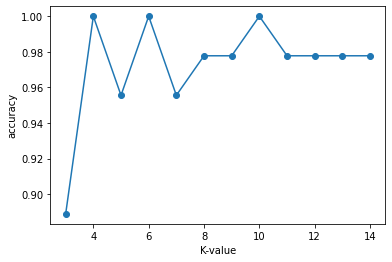

In [23]:
plt.plot(neighbors,acc_vals,'o-')
plt.xlabel('K-value')
plt.ylabel('accuracy')

### Let's choose k=4 as it is one of the k-value with highest accuracy.

In [24]:
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy for k=4: ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy for k=4:  1.0


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

### Accuracy is 100% and no miss classification found 

### b. SVM

In [25]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='rbf')
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)
print('Accuracy is :', accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is : 0.9555555555555556


array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 13]], dtype=int64)

### Here we get 95 % accuracy and 2 missclassifications.

### c.Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
df_model = DecisionTreeClassifier()
df_model.fit(X_train,y_train)
y_pred = df_model.predict(X_test)
print('Accuracy is :', accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is : 0.8444444444444444


array([[19,  0,  0],
       [ 0,  6,  7],
       [ 0,  0, 13]], dtype=int64)

### Here we get 84% accuracy and 7 missclassification.

## Hence by comparing all the four classifiers we can conclude that K Nearest Neighbors gives the best result for this data set corresponding to the scaling, test_size and other parameters that I provided on preprocessing step.

But this might change with the scaling techniques used and test_size chosen.

## Applying RandomForestAlgorithm

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import f1_score
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
confusion_matrix(y_test,y_pred)

f1_score:  0.9777448559670783


array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

### After applying RandomForestClassifier we get an f1_score of 0.97 and 1 missclassifications.
### Let us also check the feature importance.

In [28]:
pd.Series(rf.feature_importances_,index =X.columns).sort_values(ascending=False)*100

PW    48.128891
PL    37.326337
SL    10.730043
SW     3.814729
dtype: float64

## End